In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
import seaborn as sns
import category_encoders as ce
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,StackingRegressor,VotingRegressor
from keras.layers import Dense,Dropout,LSTM,GRU,SimpleRNN,Flatten
from keras.models import Sequential,Model
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

2024-05-12 07:40:35.095970: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-12 07:40:35.096073: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-12 07:40:35.097773: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df=pd.read_csv("/kaggle/input/test-file/tested.csv")

In [3]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [4]:
encoder=ce.BinaryEncoder(cols=["Sex","Cabin","Embarked","Ticket"])
df=encoder.fit_transform(df)
df.drop(columns=["Name"],inplace=True)

In [5]:
np.array(encoder)

array(BinaryEncoder(cols=['Sex', 'Cabin', 'Embarked', 'Ticket'],
              mapping=[{'col': 'Sex',
                        'mapping':     Sex_0  Sex_1
 1      0      1
 2      1      0
-1      0      0
-2      0      0},
                       {'col': 'Cabin',
                        'mapping':      Cabin_0  Cabin_1  Cabin_2  Cabin_3  Cabin_4  Cabin_5  Cabin_6
 1         0        0        0        0        0        0        1
 2         0        0        0        0        0        1        0
 3         0        0        0        0        0        1        1
 4         0        0        0        0        1        0        0
 5         0        0        0        0        1        0        1
..       ...      ...      ...      ...      ...      ...      ...
 75        1        0        0        1        0        1        1
 76        1        0        0        1        1        0        0
 77        1        0        0        1        1        0        1
-1         0        0        0

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex_0            int64
Sex_1            int64
Age            float64
SibSp            int64
Parch            int64
Ticket_0         int64
Ticket_1         int64
Ticket_2         int64
Ticket_3         int64
Ticket_4         int64
Ticket_5         int64
Ticket_6         int64
Ticket_7         int64
Ticket_8         int64
Fare           float64
Cabin_0          int64
Cabin_1          int64
Cabin_2          int64
Cabin_3          int64
Cabin_4          int64
Cabin_5          int64
Cabin_6          int64
Embarked_0       int64
Embarked_1       int64
dtype: object

In [7]:
df.nunique()

PassengerId    418
Survived         2
Pclass           3
Sex_0            2
Sex_1            2
Age             79
SibSp            7
Parch            8
Ticket_0         2
Ticket_1         2
Ticket_2         2
Ticket_3         2
Ticket_4         2
Ticket_5         2
Ticket_6         2
Ticket_7         2
Ticket_8         2
Fare           169
Cabin_0          2
Cabin_1          2
Cabin_2          2
Cabin_3          2
Cabin_4          2
Cabin_5          2
Cabin_6          2
Embarked_0       2
Embarked_1       2
dtype: int64

In [8]:
# PassengerId      
# Survived         
# Pclass           
# Sex_0            
# Sex_1            
# Age            
# SibSp            
# Parch            
# Ticket_0         
# Ticket_1         
# Ticket_2         
# Ticket_3         
# Ticket_4         
# Ticket_5         
# Ticket_6         
# Ticket_7         
# Ticket_8         
# Fare           
# Cabin_0          
# Cabin_1          
# Cabin_2          
# Cabin_3          
# Cabin_4          
# Cabin_5          
# Cabin_6          
# Embarked_0       
# Embarked_1   

In [9]:
# one_hot=OneHotEncoder()
# label_encod=LabelEncoder()

In [10]:
pass1=np.std(df["PassengerId"])
sur=np.std(df["Survived"])
pcl=np.std(df["Pclass"])
sex0=np.std(df["Sex_0"])
sex1=np.std(df["Sex_1"])
age=np.std(df["Age"])
sib=np.std(df["SibSp"])
parc=np.std(df["Parch"])
ticket0=np.std(df["Ticket_0"])
ticket1=np.std(df["Ticket_1"])
ticket2=np.std(df["Ticket_2"])
ticket3=np.std(df["Ticket_3"])
ticket4=np.std(df["Ticket_4"])
ticket5=np.std(df["Ticket_5"])
ticket6=np.std(df["Ticket_6"])
ticket7=np.std(df["Ticket_7"])
ticket8=np.std(df["Ticket_8"])
fare=np.std(df["Fare"])
cab0=np.std(df["Cabin_0"])
cab1=np.std(df["Cabin_1"])
cab2=np.std(df["Cabin_2"])
cab3=np.std(df["Cabin_3"])
cab4=np.std(df["Cabin_4"])
cab5=np.std(df["Cabin_5"])
cab6=np.std(df["Cabin_6"])
emb0=np.std(df["Embarked_0"])
emb1=np.std(df["Embarked_1"])

In [11]:
dataset=[]
for _ in range(20):
    for _,row in df.iterrows():
        dict1 = {
            "PassengerId": row["PassengerId"] + np.random.uniform(0, pass1),
            "Survived": row["Survived"] + np.random.uniform(0, sur),
            "Pclass": row["Pclass"] + np.random.uniform(0, pcl),
            "Sex_0": row["Sex_0"] + np.random.uniform(0, sex0),
            "Sex_1": row["Sex_1"] + np.random.uniform(0, sex1),
            "Age": row["Age"] + np.random.uniform(0, age),
            "SibSp": row["SibSp"] + np.random.uniform(0, sib),
            "Parch": row["Parch"] + np.random.uniform(0, parc),
            "Ticket_0": row["Ticket_0"] + np.random.uniform(0, ticket0),
            "Ticket_1": row["Ticket_1"] + np.random.uniform(0, ticket1),
            "Ticket_2": row["Ticket_2"] + np.random.uniform(0, ticket2),
            "Ticket_3": row["Ticket_3"] + np.random.uniform(0, ticket3),
            "Ticket_4": row["Ticket_4"] + np.random.uniform(0, ticket4),
            "Ticket_5": row["Ticket_5"] + np.random.uniform(0, ticket5),
            "Ticket_6": row["Ticket_6"] + np.random.uniform(0, ticket6),
            "Ticket_7": row["Ticket_7"] + np.random.uniform(0, ticket7),
            "Ticket_8": row["Ticket_8"] + np.random.uniform(0, ticket8),
            "Fare": row["Fare"] + np.random.uniform(0, fare),
            "Cabin_0": row["Cabin_0"] + np.random.uniform(0, cab0),
            "Cabin_1": row["Cabin_1"] + np.random.uniform(0, cab1),
            "Cabin_2": row["Cabin_2"] + np.random.uniform(0, cab2),
            "Cabin_3": row["Cabin_3"] + np.random.uniform(0, cab3),
            "Cabin_4": row["Cabin_4"] + np.random.uniform(0, cab4),
            "Cabin_5": row["Cabin_5"] + np.random.uniform(0, cab5),
            "Cabin_6": row["Cabin_6"] + np.random.uniform(0, cab6),
            "Embarked_0": row["Embarked_0"] + np.random.uniform(0, emb0),
            "Embarked_1": row["Embarked_1"] + np.random.uniform(0, emb1)
        }
        dataset.append(dict1)

In [12]:
j_df=pd.DataFrame(dataset)

In [13]:
j_df["Survived"]= j_df["Survived"].astype(int).values
j_df.sample(2)

,PassengerId,Survived,Pclass,Sex_0,Sex_1,Age,SibSp,Parch,Ticket_0,Ticket_1,...,Fare,Cabin_0,Cabin_1,Cabin_2,Cabin_3,Cabin_4,Cabin_5,Cabin_6,Embarked_0,Embarked_1
2378,1248.095210,0,3.549448,0.360489,1.355930,NaN,0.672411,0.337032,1.272067,0.347321,...,43.184203,0.362708,1.178381,1.14155,0.086233,0.051154,1.238983,1.033521,1.152276,1.308273
7383,1196.872207,0,2.701210,0.360935,1.101462,50.852076,1.556251,0.623684,0.086675,1.043806,...,32.917503,1.289099,0.166530,0.13300,1.090549,1.112929,0.302548,1.044341,1.203651,0.283079


In [14]:
df.size

11286

In [15]:
j_df.size

225720

In [16]:
# dataset

In [17]:
df.describe()

,PassengerId,Survived,Pclass,Sex_0,Sex_1,Age,SibSp,Parch,Ticket_0,Ticket_1,...,Fare,Cabin_0,Cabin_1,Cabin_2,Cabin_3,Cabin_4,Cabin_5,Cabin_6,Embarked_0,Embarked_1
count,418.000000,418.000000,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,418.000000,418.000000,...,417.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,0.363636,0.636364,30.272590,0.447368,0.392344,0.265550,0.368421,...,35.627188,0.813397,0.088517,0.090909,0.882775,0.885167,0.112440,0.892344,0.889952,0.354067
std,120.810458,0.481622,0.841838,0.481622,0.481622,14.181209,0.896760,0.981429,0.442155,0.482954,...,55.907576,0.390059,0.284385,0.287824,0.322074,0.319202,0.316286,0.310316,0.313324,0.478803
min,892.000000,0.000000,1.000000,0.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,7.895800,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,1100.500000,0.000000,3.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,0.000000,...,14.454200,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,1204.750000,1.000000,3.000000,1.000000,1.000000,39.000000,1.000000,0.000000,1.000000,1.000000,...,31.500000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1309.000000,1.000000,3.000000,1.000000,1.000000,76.000000,8.000000,9.000000,1.000000,1.000000,...,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
j_df.corr()

,PassengerId,Survived,Pclass,Sex_0,Sex_1,Age,SibSp,Parch,Ticket_0,Ticket_1,...,Fare,Cabin_0,Cabin_1,Cabin_2,Cabin_3,Cabin_4,Cabin_5,Cabin_6,Embarked_0,Embarked_1
PassengerId,1.000000,-0.028143,-0.022819,-0.023078,0.030738,-0.041602,0.003906,0.037989,0.645190,0.079858,...,0.004694,0.100607,0.116505,-0.000458,0.021030,-0.010243,0.009645,-0.011610,0.035758,-0.046565
Survived,-0.028143,1.000000,-0.105316,0.960576,-0.960693,0.000357,0.095646,0.154982,-0.046866,-0.011775,...,0.183029,-0.101195,0.026565,0.053798,-0.121969,-0.076059,0.092108,-0.139557,-0.112912,0.100744
Pclass,-0.022819,-0.105316,1.000000,-0.099367,0.108280,-0.447559,0.004423,0.017232,-0.000390,0.016154,...,-0.532306,0.564743,-0.346438,-0.357062,0.466939,0.414868,-0.420755,0.450266,-0.233249,-0.106667
Sex_0,-0.023078,0.960576,-0.099367,1.000000,-0.924270,-0.002819,0.093981,0.146016,-0.042584,-0.008820,...,0.175093,-0.096254,0.023575,0.053881,-0.116301,-0.076105,0.091066,-0.128413,-0.109956,0.096721
Sex_1,0.030738,-0.960693,0.108280,-0.924270,1.000000,-0.001547,-0.093606,-0.148745,0.043663,0.017150,...,-0.179630,0.101741,-0.025746,-0.054010,0.123244,0.075737,-0.089617,0.137392,0.104391,-0.097902
Age,-0.041602,0.000357,-0.447559,-0.002819,-0.001547,1.000000,-0.083224,-0.047613,0.046247,-0.104459,...,0.308596,-0.307534,0.206233,0.264659,-0.270398,-0.159021,0.187438,-0.255589,0.013515,0.144693
SibSp,0.003906,0.095646,0.004423,0.093981,-0.093606,-0.083224,1.000000,0.279258,-0.115674,0.088981,...,0.160229,-0.088979,0.041882,0.040399,-0.080654,-0.045223,0.065855,-0.064837,0.089607,-0.075462
Parch,0.037989,0.154982,0.017232,0.146016,-0.148745,-0.047613,0.279258,1.000000,-0.106807,0.162366,...,0.211208,-0.052189,0.041845,-0.023628,-0.051209,-0.001852,0.012846,-0.028597,0.117549,-0.079257
Ticket_0,0.645190,-0.046866,-0.000390,-0.042584,0.043663,0.046247,-0.115674,-0.106807,1.000000,-0.427410,...,-0.053639,0.074573,0.056581,0.063226,-0.012842,0.007487,0.012411,-0.053448,-0.021113,0.025357
Ticket_1,0.079858,-0.011775,0.016154,-0.008820,0.017150,-0.104459,0.088981,0.162366,-0.427410,1.000000,...,-0.018308,0.057688,0.125929,-0.108936,0.057625,0.037398,-0.030774,0.081192,0.090450,-0.120848


In [19]:
# sns.clustermap(j_df)

In [20]:
# df["Ticket"].describe()

In [21]:
# df["Cabin"]=pre_label_encod2
# df["Ticket"]=pre_label_encod

In [22]:
df

,PassengerId,Survived,Pclass,Sex_0,Sex_1,Age,SibSp,Parch,Ticket_0,Ticket_1,...,Fare,Cabin_0,Cabin_1,Cabin_2,Cabin_3,Cabin_4,Cabin_5,Cabin_6,Embarked_0,Embarked_1
0,892,0,3,0,1,34.5,0,0,0,0,...,7.8292,1,0,0,1,1,0,1,0,1
1,893,1,3,1,0,47.0,1,0,0,0,...,7.0000,1,0,0,1,1,0,1,1,0
2,894,0,2,0,1,62.0,0,0,0,0,...,9.6875,1,0,0,1,1,0,1,0,1
3,895,0,3,0,1,27.0,0,0,0,0,...,8.6625,1,0,0,1,1,0,1,1,0
4,896,1,3,1,0,22.0,1,1,0,0,...,12.2875,1,0,0,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,0,1,NaN,0,0,1,0,...,8.0500,1,0,0,1,1,0,1,1,0
414,1306,1,1,1,0,39.0,0,0,1,0,...,108.9000,1,0,0,1,1,0,0,1,1
415,1307,0,3,0,1,38.5,0,0,1,0,...,7.2500,1,0,0,1,1,0,1,1,0
416,1308,0,3,0,1,NaN,0,0,1,0,...,8.0500,1,0,0,1,1,0,1,1,0


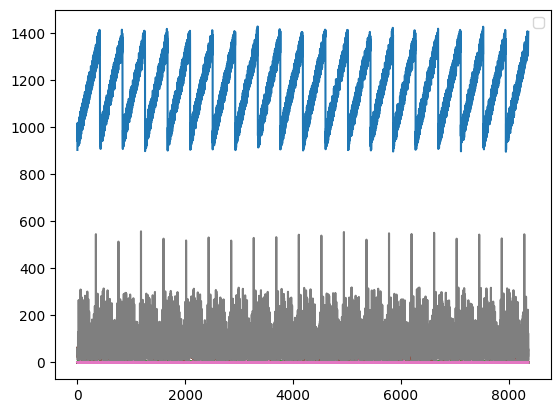

In [23]:
plt.figure()
plt.plot(j_df)
# plt.Lineplot(df["Survived"],df["Age"])
plt.legend()
plt.show()

In [24]:
# import plotly.express as px
# # data_canada = px.data.gapminder().query("country == 'Canada'")
# fig = px.bar(j_df)
# fig.show()

In [25]:
# fig = px.bar(j_df)
# fig.show()

In [26]:
j_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex_0', 'Sex_1', 'Age', 'SibSp',
       'Parch', 'Ticket_0', 'Ticket_1', 'Ticket_2', 'Ticket_3', 'Ticket_4',
       'Ticket_5', 'Ticket_6', 'Ticket_7', 'Ticket_8', 'Fare', 'Cabin_0',
       'Cabin_1', 'Cabin_2', 'Cabin_3', 'Cabin_4', 'Cabin_5', 'Cabin_6',
       'Embarked_0', 'Embarked_1'],
      dtype='object')

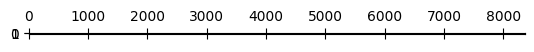

In [27]:
plt.spy([j_df["Fare"],j_df["Survived"]], markersize=10)
plt.show()

In [28]:
j_df["Survived"].nunique()

2

In [29]:
j_df=j_df.fillna(j_df.mean())
# j_df["Fare"]=j_df["Fare"].fillna(j_df.mean())

In [30]:
j_df.dropna()

,PassengerId,Survived,Pclass,Sex_0,Sex_1,Age,SibSp,Parch,Ticket_0,Ticket_1,...,Fare,Cabin_0,Cabin_1,Cabin_2,Cabin_3,Cabin_4,Cabin_5,Cabin_6,Embarked_0,Embarked_1
0,902.932684,0,3.485912,0.460443,1.359890,43.413196,0.848152,0.337862,0.050796,0.365071,...,14.527973,1.053936,0.068754,0.009677,1.094682,1.113410,0.171481,1.110152,0.093708,1.249106
1,949.409750,1,3.258328,1.067107,0.024257,51.235750,1.225249,0.318271,0.218741,0.098466,...,54.767789,1.104293,0.104833,0.265972,1.044689,1.316382,0.191503,1.013806,1.015824,0.042818
2,1001.398129,0,2.133413,0.318210,1.314780,65.869203,0.325889,0.451941,0.387796,0.143387,...,44.932364,1.002815,0.238566,0.247300,1.007870,1.278586,0.210647,1.271521,0.245931,1.426312
3,948.768860,0,3.485715,0.448953,1.262305,33.753987,0.089433,0.270636,0.438627,0.382962,...,36.989576,1.082518,0.065200,0.068868,1.054150,1.266619,0.254619,1.115220,1.268574,0.325228
4,973.762646,1,3.373808,1.256300,0.358409,24.900801,1.512764,1.236776,0.055098,0.085203,...,58.578050,1.067906,0.016574,0.066243,1.136735,1.133647,0.276050,1.117469,1.187813,0.368020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8355,1371.902114,0,3.315194,0.416196,1.160969,37.331610,0.887034,0.329276,1.349399,0.005031,...,25.712017,1.055603,0.255739,0.215395,1.199623,1.071709,0.083021,1.277760,1.196017,0.054143
8356,1346.924690,1,1.282342,1.400259,0.293467,49.781540,0.591512,0.633806,1.149941,0.420187,...,124.060433,1.178274,0.007798,0.133727,1.009109,1.000574,0.007901,0.199887,1.065675,1.402982
8357,1388.310926,0,3.023723,0.365193,1.406033,50.800120,0.057394,0.497741,1.129680,0.064061,...,44.864656,1.018356,0.083677,0.112128,1.299557,1.196451,0.145811,1.268986,1.085358,0.120464
8358,1392.910005,0,3.591037,0.025429,1.319343,37.331610,0.472006,0.238699,1.402405,0.167073,...,8.604252,1.153452,0.264503,0.153513,1.172536,1.216406,0.285148,1.264748,1.026083,0.463201


In [31]:
X=j_df.drop(columns=["Survived"])
Y=j_df["Survived"]

In [32]:
X.columns

Index(['PassengerId', 'Pclass', 'Sex_0', 'Sex_1', 'Age', 'SibSp', 'Parch',
       'Ticket_0', 'Ticket_1', 'Ticket_2', 'Ticket_3', 'Ticket_4', 'Ticket_5',
       'Ticket_6', 'Ticket_7', 'Ticket_8', 'Fare', 'Cabin_0', 'Cabin_1',
       'Cabin_2', 'Cabin_3', 'Cabin_4', 'Cabin_5', 'Cabin_6', 'Embarked_0',
       'Embarked_1'],
      dtype='object')

In [33]:
Y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [34]:
print(Y.size)
print(X.size)

8360
217360


In [35]:
j_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex_0          0
Sex_1          0
Age            0
SibSp          0
Parch          0
Ticket_0       0
Ticket_1       0
Ticket_2       0
Ticket_3       0
Ticket_4       0
Ticket_5       0
Ticket_6       0
Ticket_7       0
Ticket_8       0
Fare           0
Cabin_0        0
Cabin_1        0
Cabin_2        0
Cabin_3        0
Cabin_4        0
Cabin_5        0
Cabin_6        0
Embarked_0     0
Embarked_1     0
dtype: int64

In [36]:
print(len(Y))
print(len(X))

8360
8360


In [37]:
X.isnull().sum()

PassengerId    0
Pclass         0
Sex_0          0
Sex_1          0
Age            0
SibSp          0
Parch          0
Ticket_0       0
Ticket_1       0
Ticket_2       0
Ticket_3       0
Ticket_4       0
Ticket_5       0
Ticket_6       0
Ticket_7       0
Ticket_8       0
Fare           0
Cabin_0        0
Cabin_1        0
Cabin_2        0
Cabin_3        0
Cabin_4        0
Cabin_5        0
Cabin_6        0
Embarked_0     0
Embarked_1     0
dtype: int64

In [38]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42)

In [39]:
estimat=[
    ("lin_reg",LinearRegression()),
    ("Deci_reg",DecisionTreeRegressor()),
    ("xgboost_reg",XGBRegressor()),
    ("cat_reg",CatBoostRegressor()),
    ("svr",SVR())
]

In [40]:
stack_reg=StackingRegressor(estimators=estimat,final_estimator=RandomForestRegressor())

In [ ]:
stack_reg.fit(X_train,Y_train)

Learning rate set to 0.05472
0:	learn: 0.4541370	total: 57ms	remaining: 56.9s
1:	learn: 0.4302911	total: 63.8ms	remaining: 31.8s
2:	learn: 0.4073608	total: 69.6ms	remaining: 23.1s
3:	learn: 0.3858373	total: 75.7ms	remaining: 18.9s
4:	learn: 0.3655709	total: 82.3ms	remaining: 16.4s
5:	learn: 0.3461845	total: 88.5ms	remaining: 14.7s
6:	learn: 0.3276660	total: 94.5ms	remaining: 13.4s
7:	learn: 0.3106886	total: 101ms	remaining: 12.5s
8:	learn: 0.2940413	total: 107ms	remaining: 11.8s
9:	learn: 0.2784212	total: 113ms	remaining: 11.2s
10:	learn: 0.2637591	total: 119ms	remaining: 10.7s
11:	learn: 0.2500567	total: 125ms	remaining: 10.3s
12:	learn: 0.2368879	total: 131ms	remaining: 9.96s
13:	learn: 0.2244822	total: 137ms	remaining: 9.64s
14:	learn: 0.2126953	total: 143ms	remaining: 9.38s
15:	learn: 0.2014089	total: 149ms	remaining: 9.19s
16:	learn: 0.1910157	total: 156ms	remaining: 9.01s
17:	learn: 0.1809183	total: 162ms	remaining: 8.84s
18:	learn: 0.1715260	total: 168ms	remaining: 8.68s
19:	lea

In [43]:
print("Accuracy of Model on Validation data is:",stack_reg.score(X_test,Y_test))

Accuracy of Model on Validation data is: 0.9997918164697825


In [55]:
X_test.to_csv("titanic_test_data.csv")

In [64]:
# inputs=(1223.372288,3.093272143,0.369904609,1.469872274,37.33161034,0.465348798,0.52775862,1.270800861,0.434573069,0.204871846,0.12225162,	0.005950123,0.057072229,1.454647945,0.131261549,0.286097649,17.45964465,1.003707461,0.131751286,0.233402874,1.166059671,1.147482843,0.043920763,1.201980963,1.154292327,,0.059518374)
inputs = (1223.372288, 3.093272143, 0.369904609, 1.469872274, 37.33161034, 0.465348798, 0.52775862, 1.270800861, 0.434573069, 0.204871846, 0.12225162, 0.005950123, 0.057072229, 1.454647945, 0.131261549, 0.286097649, 17.45964465, 1.003707461, 0.131751286, 0.233402874, 1.166059671, 1.147482843, 0.043920763, 1.201980963, 1.154292327, 0.059518374)

SD=np.asarray(inputs)
sy=SD.reshape(1,-1)
se=stack_reg.predict(sy)
if se==0:
    print("Person dies")
else:
    print("person survies")

Person dies


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [62]:
se

array([0.])